In [ ]:
import pandas as pd

In [ ]:
aktier=pd.read_csv("http://pvexpect.com/IND310_2021_ESG/portfolio_3.csv", delimiter=";")
aktier

,Sector,industry,shortName222,country,website,ticker,longBusinessSummary,Virksomhed,Sak,Unnamed: 9,Unnamed: 10
0,Consumer Cyclical,Home Improvement Retail,Fiskars Corporation,Finland,http://www.fiskarsgroup.com,FSKRS.HE,Fiskars Oyj Abp manufactures and markets consu...,Fiskars Oyj Abp,Bærekraft,NaN,NaN
1,Consumer Cyclical,Residential Construction,Bonava AB ser. B,Sweden,http://www.bonava.com,BONAV-B.ST,Bonava AB (publ) develops and sells residentia...,Bonava AB (publ),Bærekraft,NaN,NaN
2,Consumer Cyclical,Restaurants,MARLEYSPN CDI1000:1,Germany,http://www.marleyspoon.de,MMM.AX,Marley Spoon AG provides subscription-based we...,Marley Spoon AG,Mat industri,NaN,https://ir.marleyspoon.com/investor-centre/?pa...
3,Consumer Defensive,Beverages—Brewers,Carlsberg B A/S,Denmark,http://www.carlsberggroup.com,CARL-B.CO,Carlsberg A/S engages in the production and sa...,Carlsberg A/S,Mat industri,NaN,https://www.carlsberggroup.com/investor-relati...
4,Consumer Defensive,Beverages—Brewers,Royal UNIBREW A/S,Denmark,http://www.royalunibrew.com,RBREW.CO,"Royal Unibrew A/S produces, markets, sells, an...",Royal Unibrew A/S,Mat industri,NaN,https://investor.royalunibrew.com/
...,...,...,...,...,...,...,...,...,...,...,...
127,Utilities,Utilities—Independent Power Producers,VERBIO VER.BIOENERGIE ON,Germany,http://www.verbio.de,VBK.DE,VERBIO Vereinigte BioEnergie AG produces and s...,VERBIO Vereinigte BioEnergie AG,Bærekraft,NaN,NaN
128,Utilities,Utilities—Renewable,ENCAVIS AG INH. O.N.,Germany,http://www.encavis.com,ECV.DE,"Encavis AG, an independent power producer, acq...",Encavis AG,Bærekraft,NaN,NaN
129,Utilities,Utilities—Renewable,ENERGIEKONTOR O.N.,Germany,http://www.energiekontor.de,EKT.DE,"Energiekontor AG, a project developer, engages...",Energiekontor AG,Bærekraft,NaN,NaN
130,Utilities,Utilities—Renewable,Fortum Corporation,Finland,http://www.fortum.com,FORTUM.HE,"Fortum Oyj, together with its subsidiaries, en...",Fortum Oyj,Bærekraft,NaN,NaN


In [ ]:
!wget https://chromedriver.storage.googleapis.com/2.42/chromedriver_linux64.zip  && unzip chromedriver_linux64

--2021-10-15 12:58:20--  https://chromedriver.storage.googleapis.com/2.42/chromedriver_linux64.zip
Resolving chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)... 74.125.26.128, 2607:f8b0:400c:c04::80
Connecting to chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)|74.125.26.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4039043 (3.9M) [application/zip]
Saving to: ‘chromedriver_linux64.zip’

chromedriver_linux6 100%[===================>]   3.85M  --.-KB/s    in 0.05s   

2021-10-15 12:58:20 (80.9 MB/s) - ‘chromedriver_linux64.zip’ saved [4039043/4039043]

Archive:  chromedriver_linux64.zip
  inflating: chromedriver            


In [ ]:
# install chromium, its driver, and selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
# set options to be headless, ..
from selenium import webdriver



Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,622 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,431 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http:

<html lang="en"><head><script src="https://geolocation.onetrust.com/cookieconsentpub/v1/geo/location/dnsfeed" async="" type="text/javascript"></script><script type="text/javascript" async="" src="https://static.chartbeat.com/js/chartbeat_video.js"></script><script type="text/javascript" async="" src="https://www.google-analytics.com/analytics.js"></script><script src="https://connect.facebook.net/signals/config/312961195854690?v=2.9.47&amp;r=stable" async=""></script><script type="text/javascript" async="" src="https://connect.facebook.net/en_US/fbevents.js"></script><script type="text/javascript" async="" src="https://www.google-analytics.com/plugins/ua/linkid.js"></script><script type="text/javascript" async="" src="https://www.google-analytics.com/gtm/js?id=GTM-KBK7743&amp;cid=1294697219.1634302743"></script><meta name="viewport" content="width=device-width"><meta charset="utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta http-equiv="x-dns-prefetch-control" content="
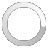
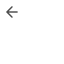

In [ ]:

from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
browser = webdriver.Chrome('chromedriver',options=options)
browser.get("https://www.reuters.com/companies/AMBUb.CO/news")
print(browser.page_source)  # results


In [ ]:
aktier.index=aktier.ticker
aktier

,Sector,industry,shortName222,country,website,ticker,longBusinessSummary,Virksomhed,Sak,Unnamed: 9,Unnamed: 10
ticker,,,,,,,,,,,
FSKRS.HE,Consumer Cyclical,Home Improvement Retail,Fiskars Corporation,Finland,http://www.fiskarsgroup.com,FSKRS.HE,Fiskars Oyj Abp manufactures and markets consu...,Fiskars Oyj Abp,Bærekraft,NaN,NaN
BONAV-B.ST,Consumer Cyclical,Residential Construction,Bonava AB ser. B,Sweden,http://www.bonava.com,BONAV-B.ST,Bonava AB (publ) develops and sells residentia...,Bonava AB (publ),Bærekraft,NaN,NaN
MMM.AX,Consumer Cyclical,Restaurants,MARLEYSPN CDI1000:1,Germany,http://www.marleyspoon.de,MMM.AX,Marley Spoon AG provides subscription-based we...,Marley Spoon AG,Mat industri,NaN,https://ir.marleyspoon.com/investor-centre/?pa...
CARL-B.CO,Consumer Defensive,Beverages—Brewers,Carlsberg B A/S,Denmark,http://www.carlsberggroup.com,CARL-B.CO,Carlsberg A/S engages in the production and sa...,Carlsberg A/S,Mat industri,NaN,https://www.carlsberggroup.com/investor-relati...
RBREW.CO,Consumer Defensive,Beverages—Brewers,Royal UNIBREW A/S,Denmark,http://www.royalunibrew.com,RBREW.CO,"Royal Unibrew A/S produces, markets, sells, an...",Royal Unibrew A/S,Mat industri,NaN,https://investor.royalunibrew.com/
...,...,...,...,...,...,...,...,...,...,...,...
VBK.DE,Utilities,Utilities—Independent Power Producers,VERBIO VER.BIOENERGIE ON,Germany,http://www.verbio.de,VBK.DE,VERBIO Vereinigte BioEnergie AG produces and s...,VERBIO Vereinigte BioEnergie AG,Bærekraft,NaN,NaN
ECV.DE,Utilities,Utilities—Renewable,ENCAVIS AG INH. O.N.,Germany,http://www.encavis.com,ECV.DE,"Encavis AG, an independent power producer, acq...",Encavis AG,Bærekraft,NaN,NaN
EKT.DE,Utilities,Utilities—Renewable,ENERGIEKONTOR O.N.,Germany,http://www.energiekontor.de,EKT.DE,"Energiekontor AG, a project developer, engages...",Energiekontor AG,Bærekraft,NaN,NaN


In [ ]:
arkiv_database=pd.DataFrame()
virksomhet_navn=[]

for index, ticker in enumerate(aktier.ticker):
  print(ticker.replace("-",""))
  try:
    
    browser.get("https://www.reuters.com/companies/"+str(ticker)+"/news")
    data=browser.find_element_by_xpath("/html/body/div[1]/div/div[4]/div[1]/div/div/div/div[2]").text
    data
    #print(data)
    arkiv=pd.DataFrame()
    for i in data.lower().split("\n")[1::3]:
      arkiv=pd.concat([arkiv,pd.DataFrame(i.split(" "))],axis=1)
      virksomhet_navn.append(str(aktier['Virksomhed'][index]).replace(" ","_").replace(",","_"))
    
    #arkiv['Virksomhed']=str(aktier['Virksomhed'][index])
    #arkiv['artiker']=pd.DataFrame((str(data.split("\n")[::3]).split(" "))).transpose() #data.split("\n")[::3]
    
    
    #arkiv_database.append(arkiv)
    arkiv_database=pd.concat([arkiv_database,arkiv], axis=1)
  except:
    print("none "+ticker)

arkiv_database=arkiv_database.transpose()
arkiv_database.index=virksomhet_navn
arkiv_database

FSKRS.HE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  if __name__ == '__main__':


BONAVB.ST
none BONAV-B.ST
MMM.AX
CARLB.CO
none CARL-B.CO
RBREW.CO
CLAB.ST
none CLA-B.ST
KWS.DE
BEI.DE
none BEI.DE
DUNI.ST
ESSITYA.ST
none ESSITY-A.ST
HEN3.DE
ATRAV.HE
RAIVV.HE
SCST.ST
SZU.DE
none SZU.DE
AAK.ST
ALKB.CO
none ALK-B.CO
BAVA.CO
BIOAB.ST
none BIOA-B.ST
BIO.DE
none BIO.DE
CAMX.ST
GMAB.CO
HNSA.ST
IBTB.ST
none IBT-B.ST
MOR.DE
none MOR.DE
NANOFH.HE
NOVOB.CO
none NOVO-B.CO
05Y.DE
ZEAL.CO
none ZEAL.CO
BOUL.ST
SHL.DE
none SHL.DE
BAYN.DE
none BAYN.DE
ORNBV.HE
BIOGB.ST
none BIOG-B.ST
DMP.DE
EVT.DE
none EVT.DE
LUN.CO
KARO.ST
MRK.DE
PROB.ST
SOBI.ST
none SOBI.ST
COP.DE
ATT.ST
none ATT.ST
FME.DE
FRE.DE
M12.DE
MCOVB.ST
none MCOV-B.ST
RHK.DE
TTALO.HE
CEVI.ST
CLNKB.ST
none CLNK-B.ST
DRW3.DE
GN.CO
SECTB.ST
none SECT-B.ST
SBS.DE
VITR.ST
ARJOB.ST
none ARJO-B.ST
ILM1.DE
none ILM1.DE
AMBUB.CO
none AMBU-B.CO
BIOT.ST
AFX.DE
COLOB.CO
none COLO-B.CO
DEMANT.CO
EKTAB.ST
none EKTA-B.ST
GXI.DE
none GXI.DE
GETIB.ST
none GETI-B.ST
SRT.DE
OKDAV.HE
HG1.DE
none HG1.DE
INWI.ST
LIAB.ST
NIBEB.ST
none NIBE-B.ST


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
Fiskars_Oyj_Abp,*,fiskars,group,to,reduce,working,hours,of,office,personnel,due,to,covid-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fiskars_Oyj_Abp,*,fiskars,is,planning,to,temporarily,close,its,stores,in,"finland,",initiates,employee,consultations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fiskars_Oyj_Abp,*,fiskars,corporation,comparable,ebita,unlikely,to,increase,in,2020,due,to,the,covid-19,outbreak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marley_Spoon_AG,*,expect,q2,2020,to,be,impacted,by,drop,in,customer,acquisition,costs,and,marketing,expenses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Royal_Unibrew_A/S,*,2020,ebit,is,now,expected,to,be,in,range,of,dkk,"1,250-1,375",million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ørsted_A/S,danish,energy,group,orsted,has,won,a,dispute,with,descendants,of,scientist,hans,christian,orsted,over,the,legal,right,to,use,his,"name,",the,supreme,court,ruled,on,monday.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ørsted_A/S,danish,energy,firm,orsted,said,on,friday,it,had,finished,building,the,largest,offshore,wind,farm,of,the,"netherlands,",the,first,in,a,range,that,should,boost,the,country's,share,of,sustainable,energy,in,the,coming,decade.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ørsted_A/S,denmark's,orsted,"<orsted.co>,",the,world's,largest,offshore,wind,farm,"operator,",has,joined,the,race,to,buy,german,solar,project,firm,ib,"vogt,",two,people,familiar,with,the,matter,"said,",in,a,sign,that,competition,for,renewable,assets,is,heating,up.,NaN,NaN,NaN,NaN,NaN
Ørsted_A/S,royal,dutch,shell,<rdsa.l>,has,hired,orsted's,<orsted.co>,north,america,chief,thomas,brostrom,as,senior,vice,president,for,its,global,renewable,solutions,department,starting,next,"year,",a,shell,spokesman,said,on,friday.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
arkiv_database

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Fiskars_Oyj_Abp,BRIEF-Fiskars,To,Reduce,Working,Hours,Of,Office,Personnel,Due,To,COVID-19,NaN,NaN,NaN,NaN
Fiskars_Oyj_Abp,BRIEF-Fiskars,To,Temporarily,Close,Stores,In,"Finland,",Initiates,Employee,Consultations,NaN,NaN,NaN,NaN,NaN
Fiskars_Oyj_Abp,BRIEF-Fiskars,Withdraws,2020,Guidance,Due,To,Coronavirus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marley_Spoon_AG,BRIEF-Marley,Spoon,AG,Sees,Q1,2020,Revenue,To,Be,Above,EUR,42.0M,NaN,NaN,NaN
Royal_Unibrew_A/S,BRIEF-Royal,Unibrew,says,2020,EBIT,Now,Expected,To,Be,In,Range,Of,DKK,"1,250-1,375",Mln
Royal_Unibrew_A/S,BRIEF-Royal,Unibrew,Q1,EBIT,Down,At,DKK,200,Mln,NaN,NaN,NaN,NaN,NaN,NaN
Royal_Unibrew_A/S,BRIEF-Royal,Unibrew,Announces,FY,2019,Net,Revenue,DKK,"7,692",Mln,Vs,DKK,"7,298",Mln,NaN


In [ ]:
#arkiv_database.index=arkiv_database['ticker']
#arkiv_database

In [ ]:
arkiv_database

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Fiskars_Oyj_Abp,BRIEF-Fiskars,To,Reduce,Working,Hours,Of,Office,Personnel,Due,To,COVID-19,NaN,NaN,NaN,NaN
Fiskars_Oyj_Abp,BRIEF-Fiskars,To,Temporarily,Close,Stores,In,"Finland,",Initiates,Employee,Consultations,NaN,NaN,NaN,NaN,NaN
Fiskars_Oyj_Abp,BRIEF-Fiskars,Withdraws,2020,Guidance,Due,To,Coronavirus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marley_Spoon_AG,BRIEF-Marley,Spoon,AG,Sees,Q1,2020,Revenue,To,Be,Above,EUR,42.0M,NaN,NaN,NaN
Royal_Unibrew_A/S,BRIEF-Royal,Unibrew,says,2020,EBIT,Now,Expected,To,Be,In,Range,Of,DKK,"1,250-1,375",Mln
Royal_Unibrew_A/S,BRIEF-Royal,Unibrew,Q1,EBIT,Down,At,DKK,200,Mln,NaN,NaN,NaN,NaN,NaN,NaN
Royal_Unibrew_A/S,BRIEF-Royal,Unibrew,Announces,FY,2019,Net,Revenue,DKK,"7,692",Mln,Vs,DKK,"7,298",Mln,NaN


In [ ]:
arkiv_database.to_csv("artikler.csv")